In [1]:
import tejapi
import pandas as pd

tejapi.ApiConfig.api_key  = "Your Key"
tejapi.ApiConfig.api_base = "https://api.tej.com.tw"
tejapi.ApiConfig.ignoretz = True

In [2]:
coid_list = ['6579', '2353', '6166', '2395', '3711', '3515', '2357', '2417', '3088', '8210', '2324', '5371', '2308', '3048', '5484', '2317', '9921', '2376', '3312', '2356', '6117', '6125', '2449', '6245', '2465', '2301', '2454', '3706', '2377', '6922', '8234', '6569', '4938', '2382', '2359', '3030', '3540', '2330', '2303', '3037', '3231', '6669', '5474'] 


In [8]:
tablebefore = tejapi.get (
    'TWN/APRCD2',
    coid = coid_list ,
    mdate = {'gte':'2024-05-02','lte':'2024-06-02'}, 
    paginate = True, 
    opts={'columns':['coid','mdate','roia']},
    )
tableafter = tejapi.get (
    'TWN/APRCD2',
    coid = coid_list ,
    mdate = {'gte':'2024-06-02','lte':'2024-07-02'}, 
    paginate = True, 
    opts={'columns':['coid','mdate','roia']},
    )


In [9]:

dfbefore = pd.DataFrame(tablebefore)

dfafter = pd.DataFrame(tableafter)


dfbefore



,coid,mdate,roia
None,,,
0,2301,2024-05-02,-0.9000
1,2301,2024-05-03,0.6054
2,2301,2024-05-06,-0.3009
3,2301,2024-05-07,-0.3018
4,2301,2024-05-08,2.4218
...,...,...,...
941,9921,2024-05-27,0.0000
942,9921,2024-05-28,1.5982
943,9921,2024-05-29,0.6742


In [10]:
average_return_rate_before = dfbefore.groupby('coid')['roia'].mean()

average_return_rate_after= dfafter.groupby('coid')['roia'].mean()


In [11]:
std_return_rate_before = dfbefore.groupby('coid')['roia'].std()


std_return_rate_after = dfafter.groupby('coid')['roia'].std()

In [14]:
sharpe_ratio_before = average_return_rate_before / std_return_rate_before *100  #ignore risk-free rate

dfbefore = pd.DataFrame(sharpe_ratio_before).reset_index()
dfbefore.rename(columns={'roia': 'Sharpe ratio bf %'}, inplace=True)


sharpe_ratio_after = average_return_rate_after / std_return_rate_after *100
dfafter = pd.DataFrame(sharpe_ratio_after).reset_index()
dfafter.rename(columns={'roia': 'Sharpe ratio aft %'}, inplace=True)


In [13]:
merged_df = pd.merge(dfbefore, dfafter, on='coid')
merged_df['Sharpe difference '] = merged_df['Sharpe ratio aft %']-merged_df['Sharpe ratio bf %']

merged_df

,coid,Sharpe ratio bf %,Sharpe ratio aft %,Sharpe difference
0,2301,12.312575,6.798626,-5.513949
1,2303,27.862752,5.378234,-22.484518
2,2308,3.825403,45.939685,42.114282
3,2317,19.818377,39.003323,19.184947
4,2324,6.891955,-49.955756,-56.847711
5,2330,13.414805,41.007175,27.592370
6,2353,23.543538,-30.757161,-54.300699
7,2356,2.572368,13.339620,10.767252
8,2357,25.830189,-17.348829,-43.179018
9,2359,49.813958,-1.975209,-51.789166


In [15]:
merged_df['increased or not'] = merged_df['Sharpe difference '].apply(lambda x: 'True' if x > 0 else 'False')

merged_df

,coid,Sharpe ratio bf %,Sharpe ratio aft %,Sharpe difference,increased or not
0,2301,12.312575,6.798626,-5.513949,False
1,2303,27.862752,5.378234,-22.484518,False
2,2308,3.825403,45.939685,42.114282,True
3,2317,19.818377,39.003323,19.184947,True
4,2324,6.891955,-49.955756,-56.847711,False
5,2330,13.414805,41.007175,27.592370,True
6,2353,23.543538,-30.757161,-54.300699,False
7,2356,2.572368,13.339620,10.767252,True
8,2357,25.830189,-17.348829,-43.179018,False
9,2359,49.813958,-1.975209,-51.789166,False


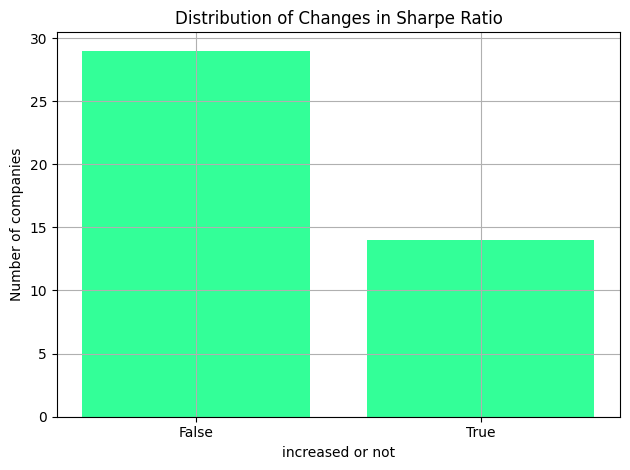

In [16]:
import matplotlib.pyplot as plt
sign_counts = merged_df['increased or not'].value_counts()


fig, ax = plt.subplots()
ax.bar(sign_counts.index, sign_counts.values, color='#00FF7F',alpha=0.8)


ax.set_xlabel('increased or not')
ax.set_ylabel('Number of companies')
ax.set_title('Distribution of Changes in Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
# 顯示圖表
plt.show()

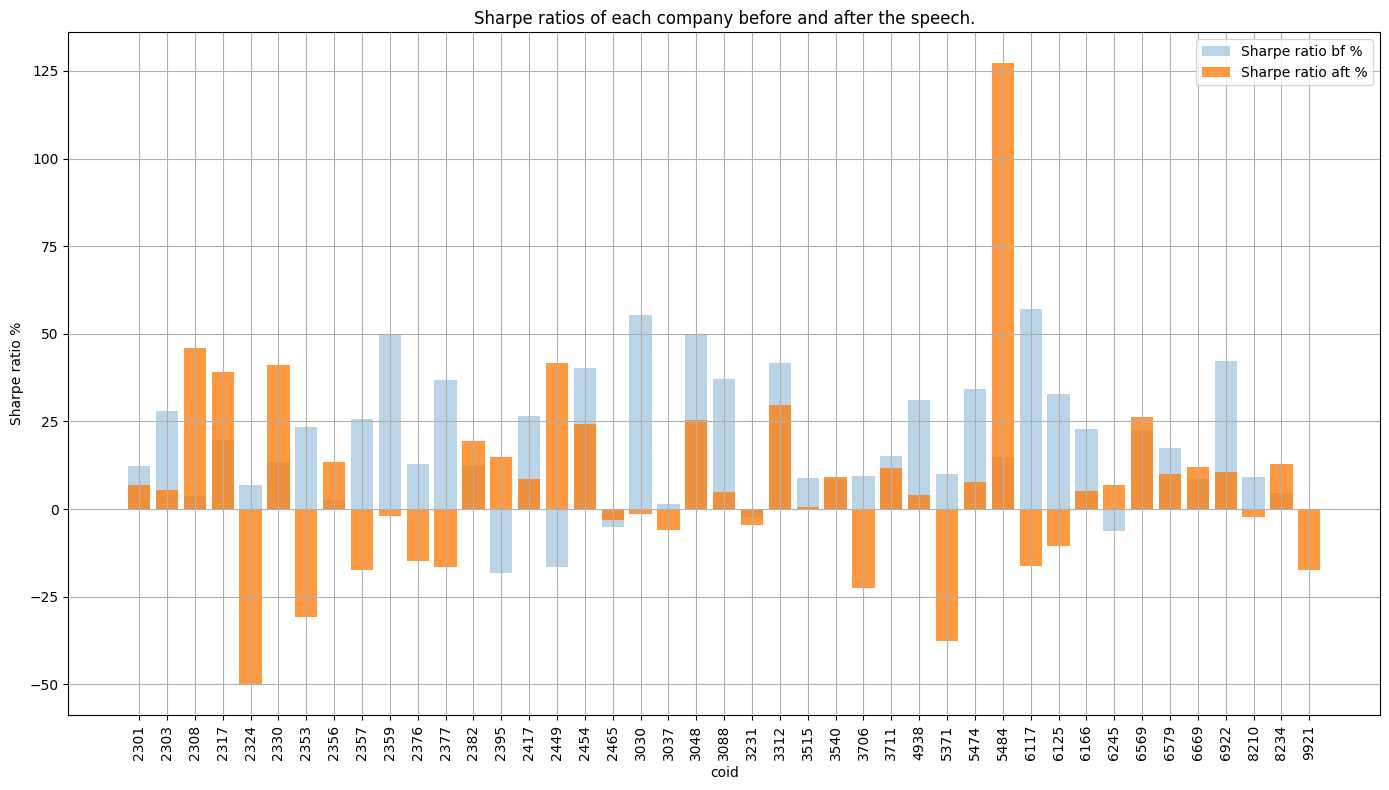

In [17]:


plt.figure(figsize=(14, 8))
plt.bar(merged_df['coid'].astype(str), merged_df['Sharpe ratio bf %'], label='Sharpe ratio bf %', alpha=0.3)
plt.bar(merged_df['coid'].astype(str), merged_df['Sharpe ratio aft %'], label='Sharpe ratio aft %', alpha=0.8)



plt.title('Sharpe ratios of each company before and after the speech.')
plt.xlabel('coid')
plt.ylabel('Sharpe ratio %')
plt.legend()

plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()